In [1]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create a Spark session
spark = SparkSession.builder.appName("TransjakartaAnalysis").getOrCreate()

In [2]:
# Load the dataset into a PySpark DataFrame
file_path = "transjakarta.csv"
transjakarta_df = spark.read.csv(file_path, header=True, inferSchema=True)

# Display the schema and first few rows of the DataFrame
transjakarta_df.printSchema()
transjakarta_df.show(5, truncate=False)

root
 |-- tahun: integer (nullable = true)
 |-- bulan: integer (nullable = true)
 |-- jenis: string (nullable = true)
 |-- kode_trayek: string (nullable = true)
 |-- trayek: string (nullable = true)
 |-- jumlah_penumpang: integer (nullable = true)

+-----+-----+----------+-----------+------------------------------------+----------------+
|tahun|bulan|jenis     |kode_trayek|trayek                              |jumlah_penumpang|
+-----+-----+----------+-----------+------------------------------------+----------------+
|2021 |8    |Mikrotrans|JAK.88     |Terminal Tanjung Priok - Ancol Barat|20245           |
|2021 |8    |Mikrotrans|JAK.85     |Bintara - Cipinang Indah            |19989           |
|2021 |8    |Mikrotrans|JAK.84     |Terminal Kampung Melayu - Kapin Raya|33638           |
|2021 |8    |Mikrotrans|JAK.80     |Rawa Buaya - Rawa Kompeni           |46653           |
|2021 |8    |Mikrotrans|JA.77      |Tanjung Priok - Jembatan Item       |47157           |
+-----+-----+----------

In [3]:
# Summary statistics
transjakarta_df.describe().show()

+-------+------+------------------+--------------------+-----------------+--------------------+------------------+
|summary| tahun|             bulan|               jenis|      kode_trayek|              trayek|  jumlah_penumpang|
+-------+------+------------------+--------------------+-----------------+--------------------+------------------+
|  count|  1473|              1473|                1473|             1473|                1471|              1473|
|   mean|2021.0| 6.534962661235574|                NULL|6.796680497925311|                NULL| 81675.86354378819|
| stddev|   0.0|3.4464507403713083|                NULL|3.544383670211192|                NULL|126533.07500162379|
|    min|  2021|                 1|Angkutan Umum Int...|                1|Andara - Stasiun ...|                 0|
|    max|  2021|                12|          Mikrotrans|           JAK.88|Ttanjung Priok - ...|           1131439|
+-------+------+------------------+--------------------+-----------------+------

In [4]:
# Check for missing values
missing_values = transjakarta_df.select([col(c).alias(c) for c in transjakarta_df.columns]).\
    select([col(c).isNull().cast("int").alias(c) for c in transjakarta_df.columns]).\
    describe()

In [5]:
# Convert missing values summary to a Pandas DataFrame for better display
missing_values.toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
tahun,1473,0.0,0.0,0,0
bulan,1473,0.0,0.0,0,0
jenis,1473,0.0,0.0,0,0
kode_trayek,1473,0.0,0.0,0,0
trayek,1473,0.0013577732518669382,0.03683545644565792,0,1
jumlah_penumpang,1473,0.0,0.0,0,0


In [6]:
#count missing value
for column in transjakarta_df.columns:
    missing_count = transjakarta_df.filter(col(column).isNull()).count()
    print(f"{column}: {missing_count}")

tahun: 0
bulan: 0
jenis: 0
kode_trayek: 0
trayek: 2
jumlah_penumpang: 0


In [7]:
# Handle missing values

transjakarta_df = transjakarta_df.na.drop()  # Drop rows with any missing values
#count missing value
for column in transjakarta_df.columns:
    missing_count = transjakarta_df.filter(col(column).isNull()).count()
    print(f"{column}: {missing_count}")

tahun: 0
bulan: 0
jenis: 0
kode_trayek: 0
trayek: 0
jumlah_penumpang: 0


In [8]:
# Explore unique values in categorical columns
unique_values = {col_name: transjakarta_df.select(col(col_name)).distinct().count() for col_name in ['tahun', 'bulan', 'jenis', 'kode_trayek', 'trayek']}
print("Unique values in each column:")
for col_name, count in unique_values.items():
    print(f"{col_name}: {count}")

Unique values in each column:
tahun: 1
bulan: 12
jenis: 3
kode_trayek: 135
trayek: 136


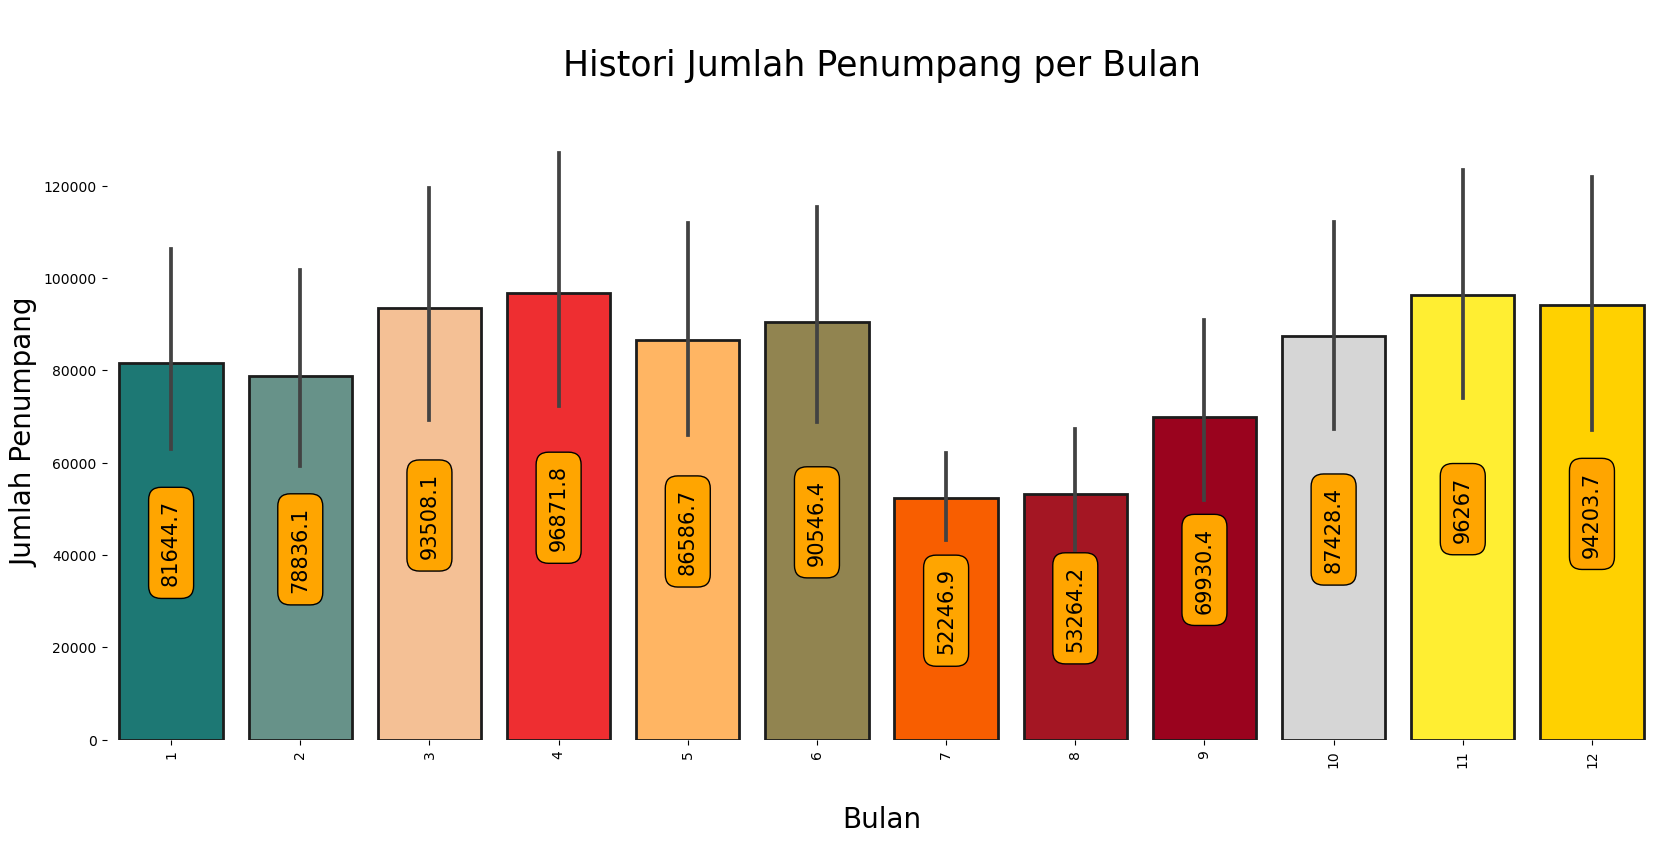

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
transjakarta_pd = transjakarta_df.toPandas()
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

plt.subplots(figsize=(20,8))
p = sns.barplot(x=transjakarta_pd["bulan"],y=transjakarta_pd["jumlah_penumpang"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nHistori Jumlah Penumpang per Bulan\n", fontsize=25)


plt.ylabel("Jumlah Penumpang" , fontsize = 20)
plt.xlabel("\nBulan" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 90)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 90,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

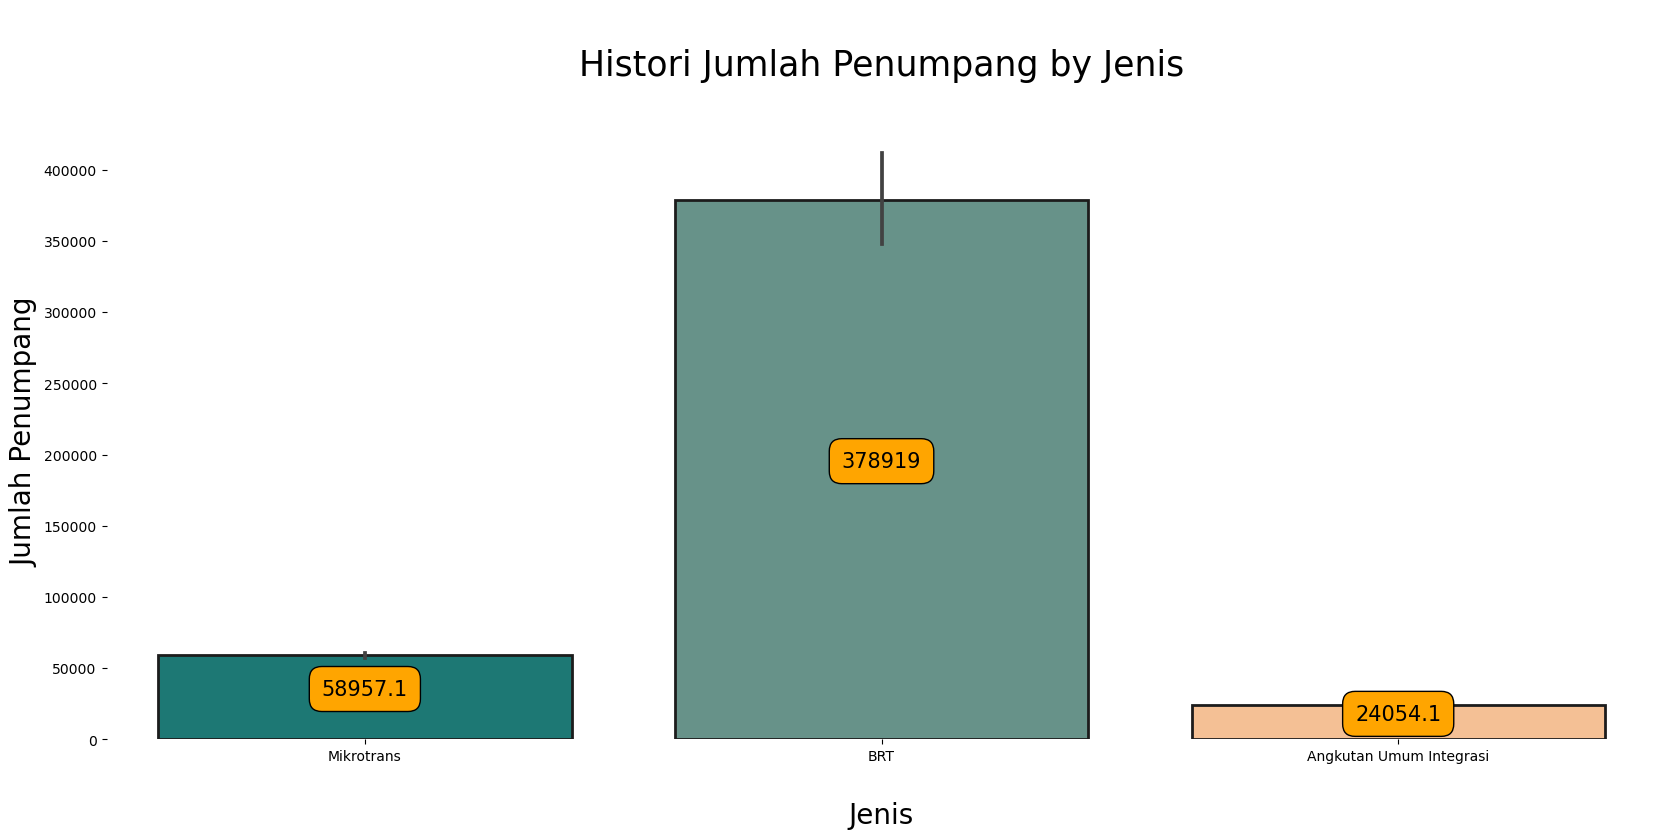

In [10]:
import seaborn as sns
transjakarta_pd = transjakarta_df.toPandas()
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

plt.subplots(figsize=(20,8))
p = sns.barplot(x=transjakarta_pd["jenis"],y=transjakarta_pd["jumlah_penumpang"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nHistori Jumlah Penumpang by Jenis\n", fontsize=25)


plt.ylabel("Jumlah Penumpang" , fontsize = 20)
plt.xlabel("\nJenis" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

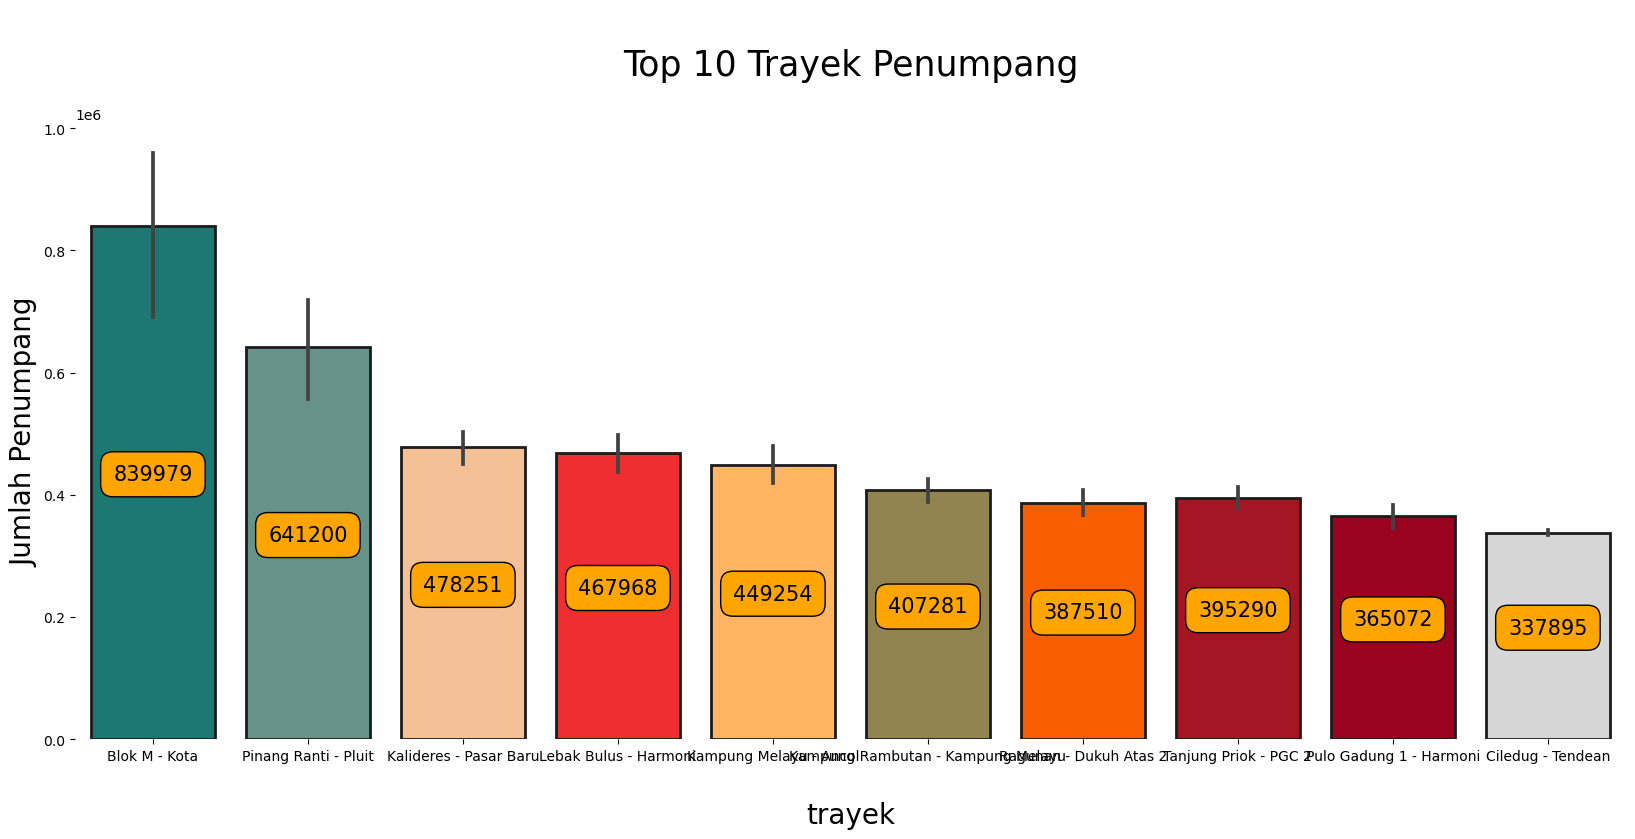

In [11]:
import seaborn as sns
transjakarta_pd = transjakarta_df.toPandas()
top_trayek_pd = transjakarta_pd.sort_values(["jumlah_penumpang"],ascending=False)
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

plt.subplots(figsize=(20,8))
p = sns.barplot(x=top_trayek_pd["trayek"][0:90],y=top_trayek_pd["jumlah_penumpang"],palette=palette, saturation=1, edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_title("\nTop 10 Trayek Penumpang\n", fontsize=25)


plt.ylabel("Jumlah Penumpang" , fontsize = 20)
plt.xlabel("\ntrayek" , fontsize = 20)
# plt.yscale("log")
plt.xticks(rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type = "center",padding = 6,size = 15,color = "black",rotation = 0,
    bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "orange", "edgecolor": "black", "alpha": 1})

sns.despine(left=True, bottom=True)
plt.show()

In [114]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import lag, col
from pyspark.sql.window import Window
from pyspark.ml.regression import GBTRegressor

In [146]:
# Select relevant columns and rename 'jumlah_penumpang' to 'label'
selected_cols = ['bulan_encoded','jenis', 'jumlah_penumpang']
df = encoded_df.select(selected_cols)
#df = df.filter(df["jenis"] == 'BRT')
df.show()

+--------------+----------+----------------+
| bulan_encoded|     jenis|jumlah_penumpang|
+--------------+----------+----------------+
|(11,[6],[1.0])|Mikrotrans|           20245|
|(11,[6],[1.0])|Mikrotrans|           19989|
|(11,[6],[1.0])|Mikrotrans|           33638|
|(11,[6],[1.0])|Mikrotrans|           46653|
|(11,[6],[1.0])|Mikrotrans|           47157|
|(11,[6],[1.0])|Mikrotrans|           34670|
|(11,[6],[1.0])|Mikrotrans|           27982|
|(11,[6],[1.0])|Mikrotrans|           50707|
|(11,[6],[1.0])|Mikrotrans|           64823|
|(11,[6],[1.0])|Mikrotrans|           48103|
|(11,[6],[1.0])|Mikrotrans|           35068|
|(11,[6],[1.0])|Mikrotrans|           20802|
|(11,[6],[1.0])|Mikrotrans|           44923|
|(11,[6],[1.0])|Mikrotrans|           43369|
|(11,[6],[1.0])|Mikrotrans|           62761|
|(11,[6],[1.0])|Mikrotrans|           33731|
|(11,[6],[1.0])|Mikrotrans|           30485|
|(11,[6],[1.0])|Mikrotrans|           28991|
|(11,[6],[1.0])|Mikrotrans|           51132|
|(11,[6],[

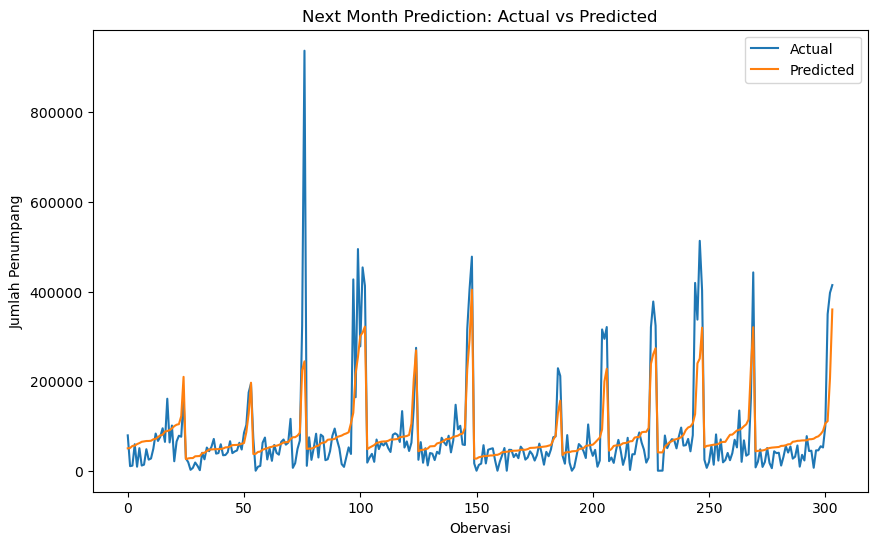

In [147]:
# Select relevant columns and rename 'jumlah_penumpang' to 'label'
selected_cols = ['bulan_encoded', 'jumlah_penumpang']
df = df.select(selected_cols).withColumnRenamed('jumlah_penumpang', 'label')

# Create a new feature for the previous month's passenger count
df = df.withColumn("previous_month_label", lag("label").over(Window.orderBy("bulan_encoded")))

# Drop rows with null values resulting from the lag operation
df = df.na.drop()

# Assemble features into a vector
feature_cols = ['bulan_encoded', 'previous_month_label']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df = assembler.transform(df).select('features', 'label')

# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)

# Create a Linear Regression model
lr = LinearRegression(featuresCol='features', labelCol='label')


# Create a pipeline
pipeline = Pipeline(stages=[lr])

# Train the model
model = pipeline.fit(train_data)

# Make predictions on the test set
predictions = model.transform(test_data)

# Visualize the predicted values against the actual values
predictions_pd = predictions.select('label', 'prediction').toPandas()

plt.figure(figsize=(10, 6))
plt.plot(predictions_pd['label'], label='Actual')
plt.plot(predictions_pd['prediction'], label='Predicted')
plt.title('Next Month Prediction: Actual vs Predicted')
plt.xlabel('Obervasi')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

In [148]:
from pyspark.ml.evaluation import RegressionEvaluator
# Evaluasi kinerja model
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse"
)
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) using Linear Regression: {rmse}")

Root Mean Squared Error (RMSE) using Linear Regression: 66473.04819569246


In [149]:
# Evaluasi kinerja model dengan Mean Absolute Error (MAE)
evaluator_mae = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mae"
)
mae = evaluator_mae.evaluate(predictions)
print(f"Mean Absolute Error (MAE) using Linear Regression: {mae}")

# Evaluasi kinerja model dengan R-squared
evaluator_r2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2"
)
r2 = evaluator_r2.evaluate(predictions)
print(f"R-squared using Linear Regression: {r2}")

Mean Absolute Error (MAE) using Linear Regression: 36063.45821652545
R-squared using Linear Regression: 0.6277593819920417


In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Extract features and target variable
pd_df = encoded_df.toPandas()
X = pd_df[['bulan']]  # Add other features as needed
y = pd_df['jumlah_penumpang']

# Convert 'bulan' to numerical values if needed (e.g., using label encoding)
# Alternatively, you can use one-hot encoding if 'bulan' is categorical
# Example of label encoding:
# X['bulan'] = X['bulan'].astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r_squared = r2_score(y_test, y_pred)

# Display the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r_squared}")



Mean Absolute Error (MAE): 74259.18006218111
Root Mean Squared Error (RMSE): 149452.37821649594
R-squared (R²): -0.008544912695568119


In [154]:
predictions.show()

+--------------------+------+------------------+
|            features| label|        prediction|
+--------------------+------+------------------+
|      (12,[0],[1.0])| 78905| 49994.83728314516|
|(12,[0,11],[1.0,1...| 10187|50758.639671379286|
|(12,[0,11],[1.0,1...| 11353| 55313.26170484101|
|(12,[0,11],[1.0,1...| 59155|55922.006465388506|
|(12,[0,11],[1.0,1...|  8999|59447.087617375386|
|(12,[0,11],[1.0,2...| 50329| 61650.78541692169|
|(12,[0,11],[1.0,2...| 11567|64557.724376380065|
|(12,[0,11],[1.0,2...| 13565|65425.420595959775|
|(12,[0,11],[1.0,3...| 48046|   66311.389599947|
|(12,[0,11],[1.0,3...| 24756| 66412.67303352008|
|(12,[0,11],[1.0,3...| 27221| 66877.32383702547|
|(12,[0,11],[1.0,3...| 49142| 70088.11309720308|
|(12,[0,11],[1.0,4...| 82972|  71082.1525689719|
|(12,[0,11],[1.0,4...| 66471| 75078.67155867266|
|(12,[0,11],[1.0,5...| 75946| 78998.96693341638|
|(12,[0,11],[1.0,5...| 94793| 80274.92936461541|
|(12,[0,11],[1.0,7...| 64400| 87552.71835435137|
|(12,[0,11],[1.0,7..

In [152]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Grid hyperparameter yang akan diuji
param_grid = (ParamGridBuilder()
              .addGrid(lr.regParam, [0.01, 0.1, 1.0])
              .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
              .build())

# Evaluasi kinerja model dengan Root Mean Squared Error (RMSE)
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse"
)

# Inisialisasi CrossValidator
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=3  # Jumlah lipatan dalam validasi silang
)

# Latih model dengan CrossValidator
cv_model = crossval.fit(train_data)

# Prediksi pada set pengujian
predictions_cv = cv_model.transform(test_data)

# Evaluasi kinerja model yang dioptimalkan
rmse_cv = evaluator.evaluate(predictions_cv)
print(f"Root Mean Squared Error (RMSE) using Linear Regression with Tuning: {rmse_cv}")

Root Mean Squared Error (RMSE) using Linear Regression with Tuning: 66473.37582474723


In [153]:
# Evaluasi kinerja model dengan Mean Absolute Error (MAE)
evaluator_mae = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="mae"
)
mae = evaluator_mae.evaluate(predictions_cv)
print(f"Mean Absolute Error (MAE) using Linear Regression: {mae}")

# Evaluasi kinerja model dengan R-squared
evaluator_r2 = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="r2"
)
r2 = evaluator_r2.evaluate(predictions_cv)
print(f"R-squared using Linear Regression: {r2}")

Mean Absolute Error (MAE) using Linear Regression: 36064.25142843557
R-squared using Linear Regression: 0.6277557126209004


Root Mean Squared Error (RMSE) using GBT Regressor: 138929.97174969895


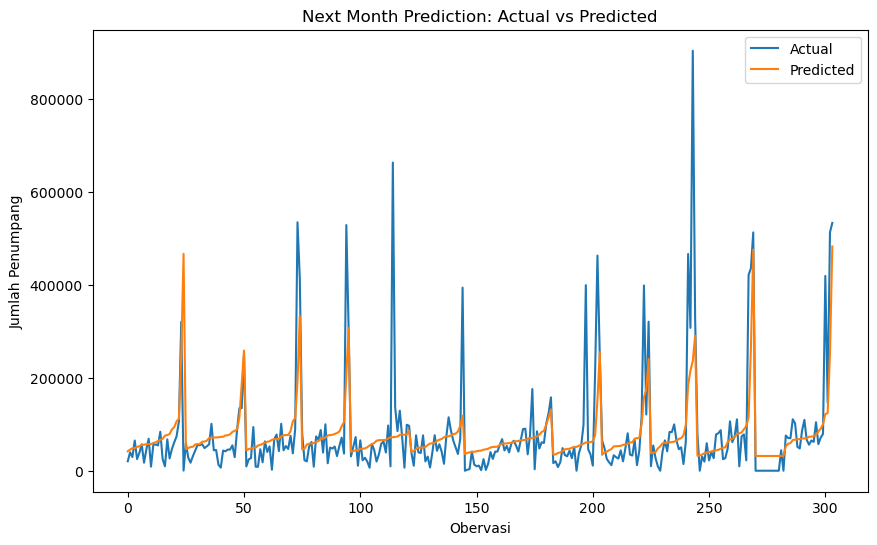

In [145]:
# Select relevant columns and rename 'jumlah_penumpang' to 'label'
selected_cols = ['bulan_encoded', 'jumlah_penumpang']
df = encoded_df.select(selected_cols).withColumnRenamed('jumlah_penumpang', 'label')
# Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=123)
# Assemble features into a vector
feature_cols = ['bulan_encoded']
assembler = VectorAssembler(inputCols=feature_cols, outputCol='features')
df = assembler.transform(df).select('features', 'label')

# Inisialisasi model GBT Regressor
gbt_reg = GBTRegressor(labelCol="label", featuresCol="features")

# Gabungkan assembler dan model ke dalam pipeline
pipeline = Pipeline(stages=[assembler, gbt_reg])

# Latih model pada set pelatihan
model_gbt_reg = pipeline.fit(train_data)

# Prediksi pada set pengujian
predictions_gbt_reg = model_gbt_reg.transform(test_data)

# Evaluasi kinerja model
evaluator_gbt_reg = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse"
)
rmse_gbt_reg = evaluator_gbt_reg.evaluate(predictions_gbt_reg)
print(f"Root Mean Squared Error (RMSE) using GBT Regressor: {rmse_gbt_reg}")


# Visualize the predicted values against the actual values
predictions_pd = predictions.select('label', 'prediction').toPandas()

plt.figure(figsize=(10, 6))
plt.plot(predictions_pd['label'], label='Actual')
plt.plot(predictions_pd['prediction'], label='Predicted')
plt.title('Next Month Prediction: Actual vs Predicted')
plt.xlabel('Obervasi')
plt.ylabel('Jumlah Penumpang')
plt.legend()
plt.show()

In [142]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer
# Gunakan StringIndexer untuk mengonversi kolom kategori menjadi indeks
indexer = StringIndexer(inputCol="bulan", outputCol="bulan_index")
encoder = OneHotEncoder(inputCol="bulan_index", outputCol="bulan_encoded")

# Buat sebuah pipeline
pipeline = Pipeline(stages=[indexer, encoder])

# Latih pipeline dan terapkan transformasi
model = pipeline.fit(transjakarta_df)
encoded_df = model.transform(transjakarta_df)

# Tampilkan hasil
encoded_df.select("bulan", "bulan_index", "bulan_encoded").show()

+-----+-----------+--------------+
|bulan|bulan_index| bulan_encoded|
+-----+-----------+--------------+
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
|    8|        6.0|(11,[6],[1.0])|
+-----+-----------+--------------+
only showing top 20 rows



In [144]:
df.show()

+--------+-----+
|features|label|
+--------+-----+
|   [8.0]|20245|
|   [8.0]|19989|
|   [8.0]|33638|
|   [8.0]|46653|
|   [8.0]|47157|
|   [8.0]|34670|
|   [8.0]|27982|
|   [8.0]|50707|
|   [8.0]|64823|
|   [8.0]|48103|
|   [8.0]|35068|
|   [8.0]|20802|
|   [8.0]|44923|
|   [8.0]|43369|
|   [8.0]|62761|
|   [8.0]|33731|
|   [8.0]|30485|
|   [8.0]|28991|
|   [8.0]|51132|
|   [8.0]|75413|
+--------+-----+
only showing top 20 rows



In [137]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

# Grid hyperparameter yang akan diuji
param_grid = (ParamGridBuilder()
              .addGrid(gbt_reg.maxDepth, [5, 10])
              .addGrid(gbt_reg.maxBins, [32, 64])
              .addGrid(gbt_reg.maxIter, [10, 20])
              .build())

# Evaluasi kinerja model dengan Root Mean Squared Error (RMSE)
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse"
)

# Inisialisasi CrossValidator
crossval = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=param_grid,
    evaluator=evaluator,
    numFolds=3  # Jumlah lipatan dalam validasi silang
)

# Latih model dengan CrossValidator
cv_model = crossval.fit(train_data)

# Prediksi pada set pengujian
predictions_cv = cv_model.transform(test_data)

# Evaluasi kinerja model yang dioptimalkan
rmse_cv = evaluator.evaluate(predictions_cv)
print(f"Root Mean Squared Error (RMSE) using GBT Regressor with Tuning: {rmse_cv}")

Root Mean Squared Error (RMSE) using GBT Regressor with Tuning: 101634.02980924728


In [ ]:
# Stop the Spark session
spark.stop()